In [1]:
!pip install yfinance


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/14/03/3c854ca3e02eedf614abba4b2e177c469bf3af58207fa30d5098c5d652fe/yfinance-0.2.37-py2.py3-none-any.whl.metadata
  Obtaining dependency information for pandas>=1.3.0 from https://files.pythonhosted.org/packages/71/00/6beaeeba7f075d15ea167a5caa039b861e58ff2f58a5b659abb9b544c8f6/pandas-2.2.1-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for numpy>=1.16.5 from https://files.pythonhosted.org/packages/16/2e/86f24451c2d530c88daf997cb8d6ac622c1d40d19f5a031ed68a4b73a374/numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata
     -------------------------------------- 61.0/61.0 kB 819.4 kB/s eta 0:00:00
  Obtaining dependency information for requests>=2.31 from https://files.pythonhosted.org/packages/70/8e/0e2d847013cb52cd35b38c009bb167a1a26b2ce6cd6965bf26b47bc0bf44/requests-2.31.0-py3-none-any.whl.metadata
  Using cached requests-2.31.0-py3-none-any.whl.metadata (4.6 kB)
  Obtaining d

In [4]:
#importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import yfinance as yf
from datetime import datetime

warnings.filterwarnings('ignore')

In [33]:
# Getting the current date
current_date = datetime.now().strftime('%Y-%m-%d')

# Importing the data from yahoo finance with current date as end date
data = yf.download("^NSEI", start="2013-12-02", end=current_date, interval="1d")

#checking the tail
data.tail() 

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-03-04,22403.500000,22440.900391,22358.300781,22405.599609,22405.599609,298800
2024-03-05,22371.250000,22416.900391,22269.150391,22356.300781,22356.300781,296200
2024-03-06,22327.500000,22497.199219,22224.349609,22474.050781,22474.050781,312300
2024-03-07,22505.300781,22525.650391,22430.000000,22493.550781,22493.550781,379900
2024-03-11,22517.500000,22526.599609,22307.250000,22332.650391,22332.650391,277900


In [9]:
type(data)

pandas.core.frame.DataFrame

In [10]:
df = round(data,2)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-12-02,6171.15,6228.70,6171.15,6217.85,6217.85,145900
2013-12-03,6204.25,6225.40,6191.40,6201.85,6201.85,156900
2013-12-04,6187.95,6209.15,6149.90,6160.95,6160.95,186200
2013-12-05,6262.45,6300.55,6232.00,6241.10,6241.10,186100
2013-12-06,6234.40,6275.35,6230.75,6259.90,6259.90,158500


In [11]:
#creating the new column to calculate daily returns

df['Prev Close']=df['Adj Close'].shift(1)
df

,Open,High,Low,Close,Adj Close,Volume,Prev Close
Date,,,,,,,
2013-12-02,6171.15,6228.70,6171.15,6217.85,6217.85,145900,NaN
2013-12-03,6204.25,6225.40,6191.40,6201.85,6201.85,156900,6217.85
2013-12-04,6187.95,6209.15,6149.90,6160.95,6160.95,186200,6201.85
2013-12-05,6262.45,6300.55,6232.00,6241.10,6241.10,186100,6160.95
2013-12-06,6234.40,6275.35,6230.75,6259.90,6259.90,158500,6241.10
...,...,...,...,...,...,...,...
2024-03-04,22403.50,22440.90,22358.30,22405.60,22405.60,298800,22338.75
2024-03-05,22371.25,22416.90,22269.15,22356.30,22356.30,296200,22405.60
2024-03-06,22327.50,22497.20,22224.35,22474.05,22474.05,312300,22356.30


In [12]:
#converting only to two columns which are required for calculations ahead
df = df[['Adj Close', 'Prev Close']]
df

,Adj Close,Prev Close
Date,,
2013-12-02,6217.85,NaN
2013-12-03,6201.85,6217.85
2013-12-04,6160.95,6201.85
2013-12-05,6241.10,6160.95
2013-12-06,6259.90,6241.10
...,...,...
2024-03-04,22405.60,22338.75
2024-03-05,22356.30,22405.60
2024-03-06,22474.05,22356.30


In [13]:
#getting the description summary rounded to 2 decimals
round(df['Adj Close'].describe(),2)

count     2522.00
mean     12047.32
std       4177.41
min       6000.90
25%       8524.93
50%      10800.85
75%      15855.52
max      22493.55
Name: Adj Close, dtype: float64

In [14]:
#adding daily % change 
df['Pct Change']=np.log(df['Adj Close']/df['Prev Close'])
df

,Adj Close,Prev Close,Pct Change
Date,,,
2013-12-02,6217.85,NaN,NaN
2013-12-03,6201.85,6217.85,-0.002577
2013-12-04,6160.95,6201.85,-0.006617
2013-12-05,6241.10,6160.95,0.012925
2013-12-06,6259.90,6241.10,0.003008
...,...,...,...
2024-03-04,22405.60,22338.75,0.002988
2024-03-05,22356.30,22405.60,-0.002203
2024-03-06,22474.05,22356.30,0.005253


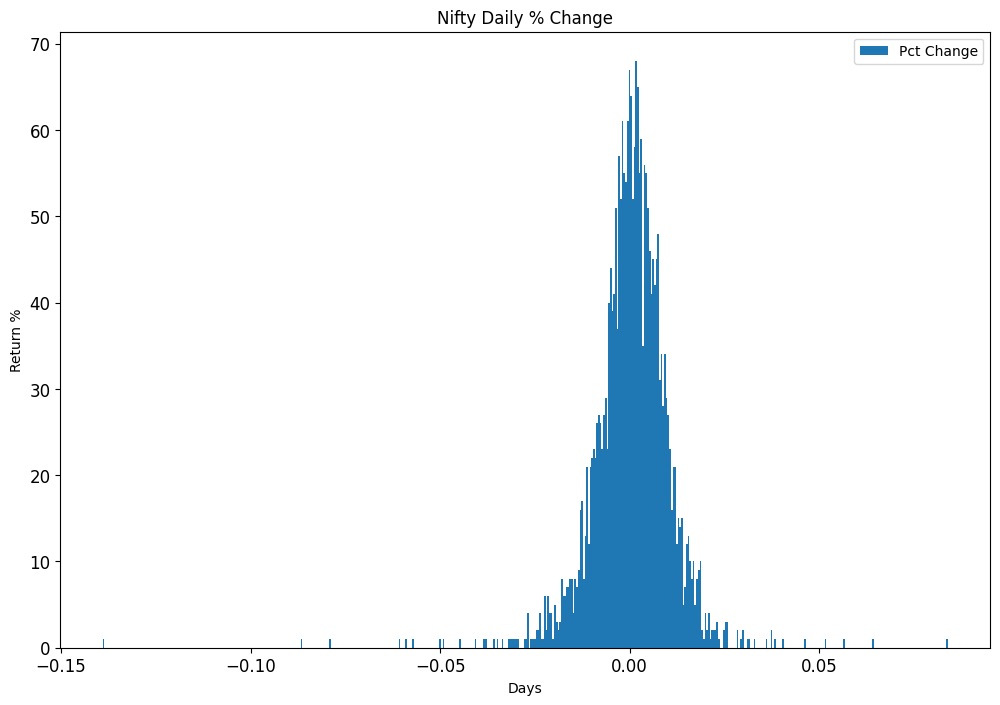

In [15]:
#plotting the daily returns via histogram

df.hist('Pct Change', grid=False, figsize=(12,8), bins=500, legend=True, xlabelsize=12, ylabelsize=12)
plt.title('Nifty Daily % Change')
plt.xlabel('Days')
plt.ylabel('Return %')
plt.show()

In [16]:
#calculating cumulative returns over the period
df['Pct Change'].sum()

1.278625545406635

In [17]:
#calculating final or arithmetic return

round(np.exp(df['Pct Change'].sum()),2) #since it was log, we used anti log by powering to e

3.59

In [18]:
#what is an investment in 1 unit of nifty worth after 10y

final_value = df['Adj Close'][0]*np.exp(df['Pct Change'].sum())
round(final_value,1)

22332.7

In [19]:
df
#the final_value is showng exatly same as the last row adj close as shown below in table

,Adj Close,Prev Close,Pct Change
Date,,,
2013-12-02,6217.85,NaN,NaN
2013-12-03,6201.85,6217.85,-0.002577
2013-12-04,6160.95,6201.85,-0.006617
2013-12-05,6241.10,6160.95,0.012925
2013-12-06,6259.90,6241.10,0.003008
...,...,...,...
2024-03-04,22405.60,22338.75,0.002988
2024-03-05,22356.30,22405.60,-0.002203
2024-03-06,22474.05,22356.30,0.005253


In [20]:
#calculating the value of the investment ath the end of each day

np.exp(df['Pct Change'].cumsum())

Date
2013-12-02         NaN
2013-12-03    0.997427
2013-12-04    0.990849
2013-12-05    1.003739
2013-12-06    1.006763
                ...   
2024-03-04    3.603432
2024-03-05    3.595503
2024-03-06    3.614441
2024-03-07    3.617577
2024-03-11    3.591700
Name: Pct Change, Length: 2522, dtype: float64

In [21]:
#lets add this feature as new column in df

df['cum_ret'] = round(np.exp(df['Pct Change'].cumsum()),2)
df

,Adj Close,Prev Close,Pct Change,cum_ret
Date,,,,
2013-12-02,6217.85,NaN,NaN,NaN
2013-12-03,6201.85,6217.85,-0.002577,1.00
2013-12-04,6160.95,6201.85,-0.006617,0.99
2013-12-05,6241.10,6160.95,0.012925,1.00
2013-12-06,6259.90,6241.10,0.003008,1.01
...,...,...,...,...
2024-03-04,22405.60,22338.75,0.002988,3.60
2024-03-05,22356.30,22405.60,-0.002203,3.60
2024-03-06,22474.05,22356.30,0.005253,3.61


In [22]:
#dropping NaN
df.dropna(inplace=True)
df

,Adj Close,Prev Close,Pct Change,cum_ret
Date,,,,
2013-12-03,6201.85,6217.85,-0.002577,1.00
2013-12-04,6160.95,6201.85,-0.006617,0.99
2013-12-05,6241.10,6160.95,0.012925,1.00
2013-12-06,6259.90,6241.10,0.003008,1.01
2013-12-09,6363.90,6259.90,0.016477,1.02
...,...,...,...,...
2024-03-04,22405.60,22338.75,0.002988,3.60
2024-03-05,22356.30,22405.60,-0.002203,3.60
2024-03-06,22474.05,22356.30,0.005253,3.61


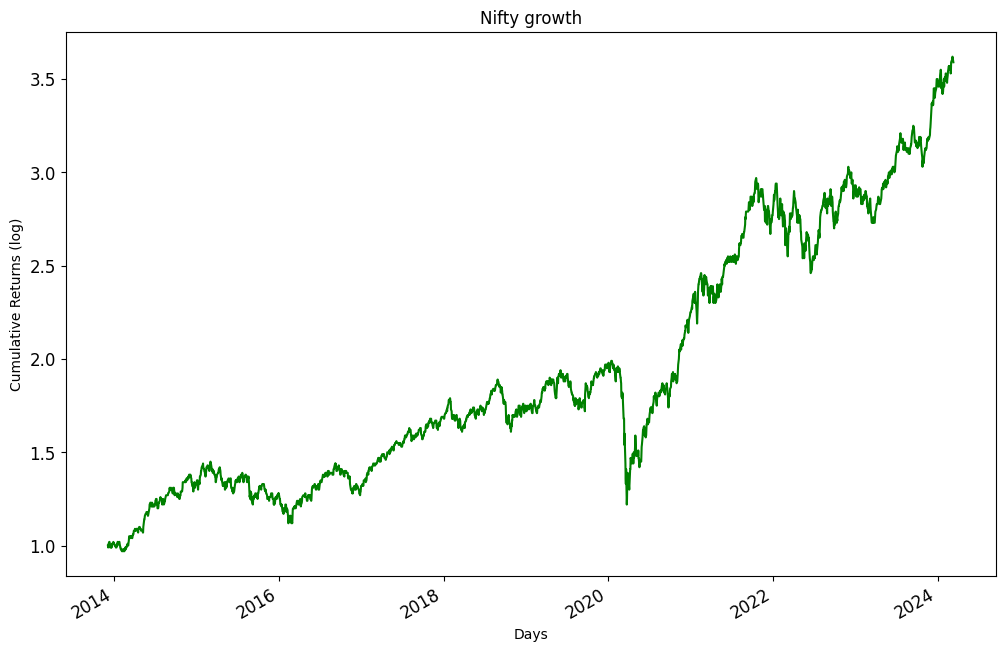

In [23]:
#Let's plot the cumulative returns

df['cum_ret'].plot(figsize=(12,8), c='Green', fontsize=12)
plt.title('Nifty growth')
plt.xlabel('Days')
plt.ylabel('Cumulative Returns (log)')
plt.show()

In [24]:
#calculating daily avg return

daily_return = df['Pct Change'].mean()
daily_return

#annualised return

ann_return = daily_return*252
print(daily_return)
print(ann_return)

0.0005071898236440439
0.12781183555829906


In [25]:
#daily std devn

daily_stdev = df['Pct Change'].std()

#annualised std dev

ann_stdev = daily_stdev*np.sqrt(252)

print(daily_stdev)
print(ann_stdev)

0.010424814712765474
0.16548880316342812


In [26]:
#calculating Maximum drawdown

df['cum_max']=df['cum_ret'].cummax()

print(df.head(20))
print(df.tail(20))

            Adj Close  Prev Close  Pct Change  cum_ret  cum_max
Date                                                           
2013-12-03    6201.85     6217.85   -0.002577     1.00     1.00
2013-12-04    6160.95     6201.85   -0.006617     0.99     1.00
2013-12-05    6241.10     6160.95    0.012925     1.00     1.00
2013-12-06    6259.90     6241.10    0.003008     1.01     1.01
2013-12-09    6363.90     6259.90    0.016477     1.02     1.02
2013-12-10    6332.85     6363.90   -0.004891     1.02     1.02
2013-12-11    6307.90     6332.85   -0.003948     1.01     1.02
2013-12-12    6237.05     6307.90   -0.011296     1.00     1.02
2013-12-13    6168.40     6237.05   -0.011068     0.99     1.02
2013-12-16    6154.70     6168.40   -0.002223     0.99     1.02
2013-12-17    6139.05     6154.70   -0.002546     0.99     1.02
2013-12-18    6217.15     6139.05    0.012642     1.00     1.02
2013-12-19    6166.65     6217.15   -0.008156     0.99     1.02
2013-12-20    6274.25     6166.65    0.0

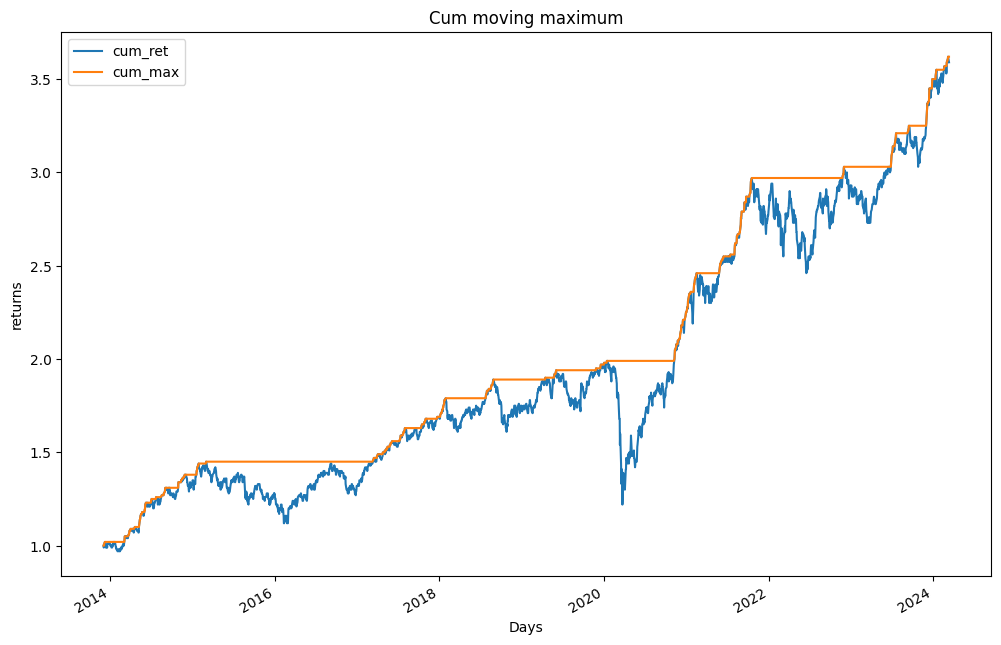

In [27]:
#plotting the cumulative return and the cum max return

df[['cum_ret','cum_max']].plot(figsize=(12,8))
plt.title('Cum moving maximum')
plt.xlabel('Days')
plt.ylabel('returns')
plt.show()

In [28]:
#calculating drawdown column

df['Drawdown']=df['cum_max']-df['cum_ret']
df

,Adj Close,Prev Close,Pct Change,cum_ret,cum_max,Drawdown
Date,,,,,,
2013-12-03,6201.85,6217.85,-0.002577,1.00,1.00,0.00
2013-12-04,6160.95,6201.85,-0.006617,0.99,1.00,0.01
2013-12-05,6241.10,6160.95,0.012925,1.00,1.00,0.00
2013-12-06,6259.90,6241.10,0.003008,1.01,1.01,0.00
2013-12-09,6363.90,6259.90,0.016477,1.02,1.02,0.00
...,...,...,...,...,...,...
2024-03-04,22405.60,22338.75,0.002988,3.60,3.60,0.00
2024-03-05,22356.30,22405.60,-0.002203,3.60,3.60,0.00
2024-03-06,22474.05,22356.30,0.005253,3.61,3.61,0.00


In [29]:
#let's look at max drawdown

max_dd = df['Drawdown'].max()
max_dd

0.77

In [30]:
#checking the time stamp

max_dd_date = df['Drawdown'].idxmax()
max_dd_date

Timestamp('2020-03-23 00:00:00')

In [31]:
#let's look at the index

np.where(df['Drawdown']==0.77)

(array([1538], dtype=int64),)

In [32]:
#pulling up the index

df.iloc[1538]

Adj Close     7610.250000
Prev Close    8745.450000
Pct Change      -0.139038
cum_ret          1.220000
cum_max          1.990000
Drawdown         0.770000
Name: 2020-03-23 00:00:00, dtype: float64